In [1]:
# import library
%run lib.ipynb

# Universal estimator
Let $f(d)$ be a one dimensional function, that returns a PMF sample drawn from a univariate distribution (e.g., log-normal).

A function *universal_estimator(f, sample)* learns the parameter $d$ of $f$ from the sample.

## Parameter adjustment
The *universal estimator engine*, is allowed to assume that the parameter value is in the range [0,1].

Internaly we use an auxiliary function to map a parameter from the range [0, 1] to the full range that the function $f(d)$ takes.

For that, we rely on the tangent function, which in the range $[-\frac{\pi}{2}, \frac{\pi}{2}]$ gives values in the range: $[-\infty, \infty]$.

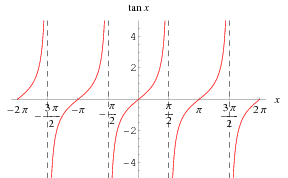

The following *adjuster* function returns an inner function which maps a parameter $x \in$ [0,1] to the range [min, max].


In [2]:
def adjuster(min_param, max_param):
    def adjust(x):
        LOW = -math.pi/2 if min_param == -math.inf else math.atan(min_param)
        HIGH = math.pi/2 if max_param == math.inf else math.atan(max_param)
        if x < 0: x = 0 # undefined if x < 0
        if x > 1: x = 1 # undefined if x > 1
        return math.tan(LOW + x * (HIGH - LOW))
    return adjust

## log-normal auxilary

In [13]:
from scipy import stats
from scipy.stats import lognorm

# sample from lognormal
def sample_lognormal(config, size):
    return lognorm.rvs(s=config, size=size, random_state=RANDOM_STATE)

# return a (uniform) random parameter within the range [low, high]
def next_config(low, high):
    return np.random.uniform(low, high, size=1)[0]

# test
adjust = adjuster(min_param=0, max_param=math.inf)
# sample_lognormal(adjust(0.2), size=256)
print(f'adjust(-1.0): {adjust(-1.0):.4f}')
print(f'adjust(0.0): {adjust(0.0):.4f}')
print(f'adjust(0.2): {adjust(0.2):.4f}')
print(f'adjust(0.5): {adjust(0.5):.4f}')
print(f'adjust(0.92): {adjust(0.92):.4f}')
print(f'adjust(1.0): {adjust(1.0)}')
print(f'adjust(2.0): {adjust(2.0)}')


adjust(-1.0): 0.0000
adjust(0.0): 0.0000
adjust(0.2): 0.3249
adjust(0.5): 1.0000
adjust(0.92): 7.9158
adjust(1.0): 1.633123935319537e+16
adjust(2.0): 1.633123935319537e+16
